# Periodization

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2
from sympy.abc import A,B,t,f 
from sympy import re, im 

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
ts = Symbol('t')
fs = Symbol('f')
Npts = 10**4
zero =[0]
Tol = 1e-4
I = 4 # number of periods to consider
colorz = ['r','m','g','c','k','y','r','g']

In [3]:
# defines part of X(f)
if 0:
    f0 = 26; delta = 4; width = 2 # PDF with width
elif 0:
    f0 = 26; delta = 0.1; width = 0.1 # sinusoids deltas
else:
    f0 = 40; delta = 0.1; width = 0.1 # sinusoids deltas

Fs = 40       # sample freq

In [4]:
flim = (I-1)*Fs
ff = np.linspace(-flim, flim, Npts)

In [5]:
def Xpart(A = -1/2,B = 1/2):
    return Piecewise((0, f <= A-delta),((f-(A-delta))/delta, f < A),(1, f < B),((delta+B-f)/(delta), f < B+(delta)),(0, True))

def Xf(A = 5,offset = 0):
    B = A + width
    return Xpart(-B+offset,-A+offset) + Xpart(A+offset,B+offset)

Xfh = 0 # periodized X(f)
for k in range(-I,I+1):
    Xfh += Xf(f0,k*Fs)

lam_Xfh = lambdify(fs, Xfh, modules=['numpy'])
lam_Xf = lambdify(fs, Xf(f0,0), modules=['numpy'])

II = np.argwhere((-Fs/2 < ff) & (ff <= Fs/2)).flatten()
err = lam_Xfh(ff[II]) - lam_Xf(ff[II])
error = np.sqrt(np.dot(err,err))

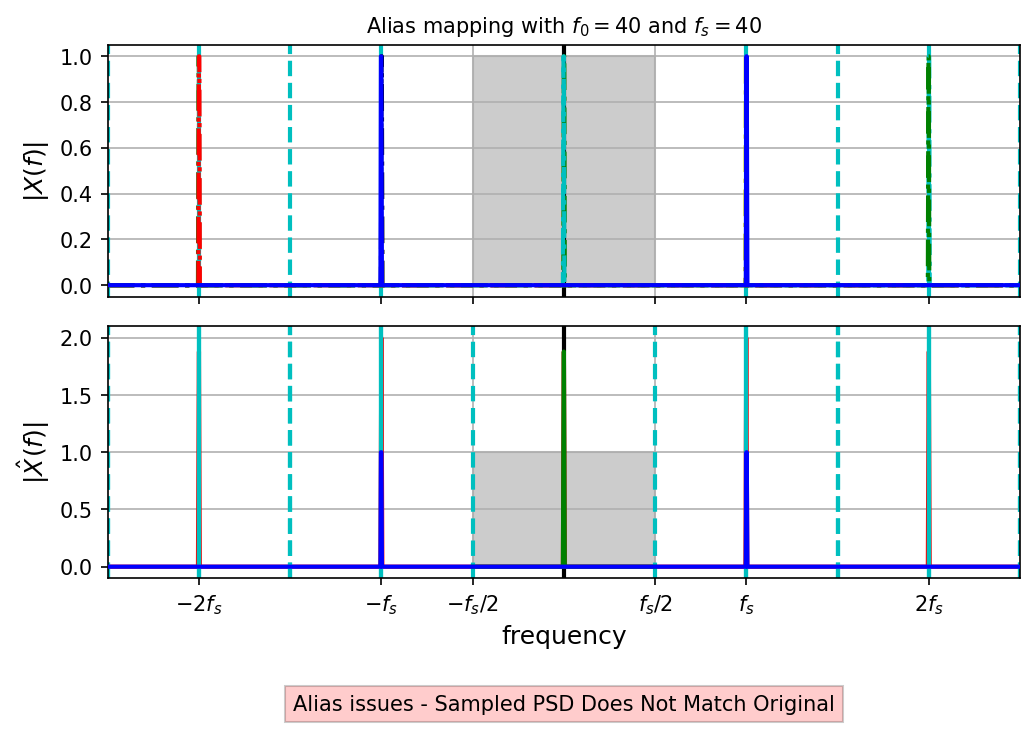

In [6]:
fig,ax = plt.subplots(2,1,figsize=(7,5),sharex=True)
ax[0].plot(ff,lam_Xf(ff),c='b',lw=2,zorder=10)
ax[0].axvline(x=0,c='k')
for k in range(1,I):
    ax[0].plot(ff,lam_Xf(ff+k*Fs),c=colorz[2*k],ls='-.')
    ax[0].plot(ff,lam_Xf(ff-k*Fs),c=colorz[2*k+1],ls='-.')
    ax[0].axvline(x=k*Fs+Fs/2,c='c',ls='--')
    ax[0].axvline(x=-k*Fs-Fs/2,c='c',ls='--')
    ax[0].axvline(x=k*Fs,c='c')
    ax[0].axvline(x=-k*Fs,c='c')
rect = plt.Rectangle((-Fs/2,0), Fs, 1, alpha=0.4,color="grey")
ax[0].add_patch(rect)
ax[0].set_title("Alias mapping with $f_0=$"+str(f0)+" and $f_s=$"+str(Fs))
ax[0].set_ylabel('$|X(f)|$',fontsize=12)

ax[1].plot(ff,lam_Xf(ff),c='b',lw=2,zorder=10)
ax[1].plot(ff,lam_Xfh(ff),c='r')
ax[1].axvline(x=0,c='k')
ax[1].plot(ff[II],lam_Xfh(ff[II]), color="green",zorder=9)
for k in [i for i in range(-I,I+1) if i not in zero]:
    ax[1].axvline(x=k*Fs+Fs/2,c='c',ls='--')
    ax[1].axvline(x=-k*Fs-Fs/2,c='c',ls='--')
    ax[1].axvline(x=k*Fs,c='c')
    ax[1].axvline(x=-k*Fs,c='c')
rect = plt.Rectangle((-Fs/2,0), Fs, 1, alpha=0.4,color="grey")
ax[1].add_patch(rect)
ax[1].set_xticks([-3*Fs,-2*Fs,-Fs,-Fs/2,Fs/2,Fs,2*Fs,3*Fs],["$-3f_s$","$-2f_s$","$-f_s$","$-f_s/2$","$f_s/2$","$f_s$","$2f_s$","$3f_s$"])
ax[1].set_xlim([-2.5*Fs,2.5*Fs])
ax[1].set_xlabel('frequency',fontsize=12)
ax[1].set_ylabel('$|\hat X(f)|$',fontsize=12)
if error < Tol:
    text1 = "Sampled PSD Matches Original"; fc = 'blue'
else:
    text1 = "Alias issues - Sampled PSD Does Not Match Original"; fc = 'red'
plt.text(.5, -0.5, text1, horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes,bbox=dict(facecolor=fc, alpha=0.2))
plt.show()

In [7]:
%run wheel.py

Terminator: 